# Data Exploration and Feature Engineering

### Load Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime 
import datetime as dt
import matplotlib.pyplot as plt

### Load Data

In [3]:
flights = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\cleaned_flights_sample.csv', delimiter=',', low_memory=False)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-10-26,UA,WN,WN,4052,EV,N8541W,2542,12954,LGB,...,1.0,528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-26,DL,UA,UA,2733,DL,N938FR,351,13930,ORD,...,1.0,404.0,NaN,NaN,18.0,0.0,0.0,NaN,NaN,NaN
2,2019-02-06,WN,NK,NK,5531,OO,N367CA,6266,10868,CAE,...,1.0,93.0,40.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
3,2019-11-11,DL,DL,DL,629,B6,N907WN,4607,14869,SLC,...,1.0,315.0,NaN,NaN,20.0,0.0,NaN,NaN,NaN,NaN
4,2019-03-25,WN,WN,WN,296,HA,N434YX,4535,14771,SFO,...,1.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fuel = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\cleaned_fuel_consumption.csv', delimiter=',', low_memory=False)
fuel.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,20408.932432,unique_carrier_unknown,0JQ,carrier_name_unknown,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.000000,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.000000,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.000000,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.000000,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016


In [5]:
passengers = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\cleaned_passengers.csv', delimiter=',', low_memory=False)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-10-26,UA,WN,WN,4052,EV,N8541W,2542,12954,LGB,...,1.0,528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-26,DL,UA,UA,2733,DL,N938FR,351,13930,ORD,...,1.0,404.0,NaN,NaN,18.0,0.0,0.0,NaN,NaN,NaN
2,2019-02-06,WN,NK,NK,5531,OO,N367CA,6266,10868,CAE,...,1.0,93.0,40.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
3,2019-11-11,DL,DL,DL,629,B6,N907WN,4607,14869,SLC,...,1.0,315.0,NaN,NaN,20.0,0.0,NaN,NaN,NaN,NaN
4,2019-03-25,WN,WN,WN,296,HA,N434YX,4535,14771,SFO,...,1.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test = pd.read_csv(r'C:\Users\Ryan\Lighthouse\Bootcamp\w6\midterm\Data\cleaned\flights_test.csv', delimiter=',', low_memory=False)
test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333


### Exploratory Analysis - Checking Correlations within Each Table

In [11]:
#Table Correlations
flights_corr = flights.corr()
fuel_corr = fuel.corr()
passengers_corr = passengers.corr()
test_corr = test.corr()

<AxesSubplot:>

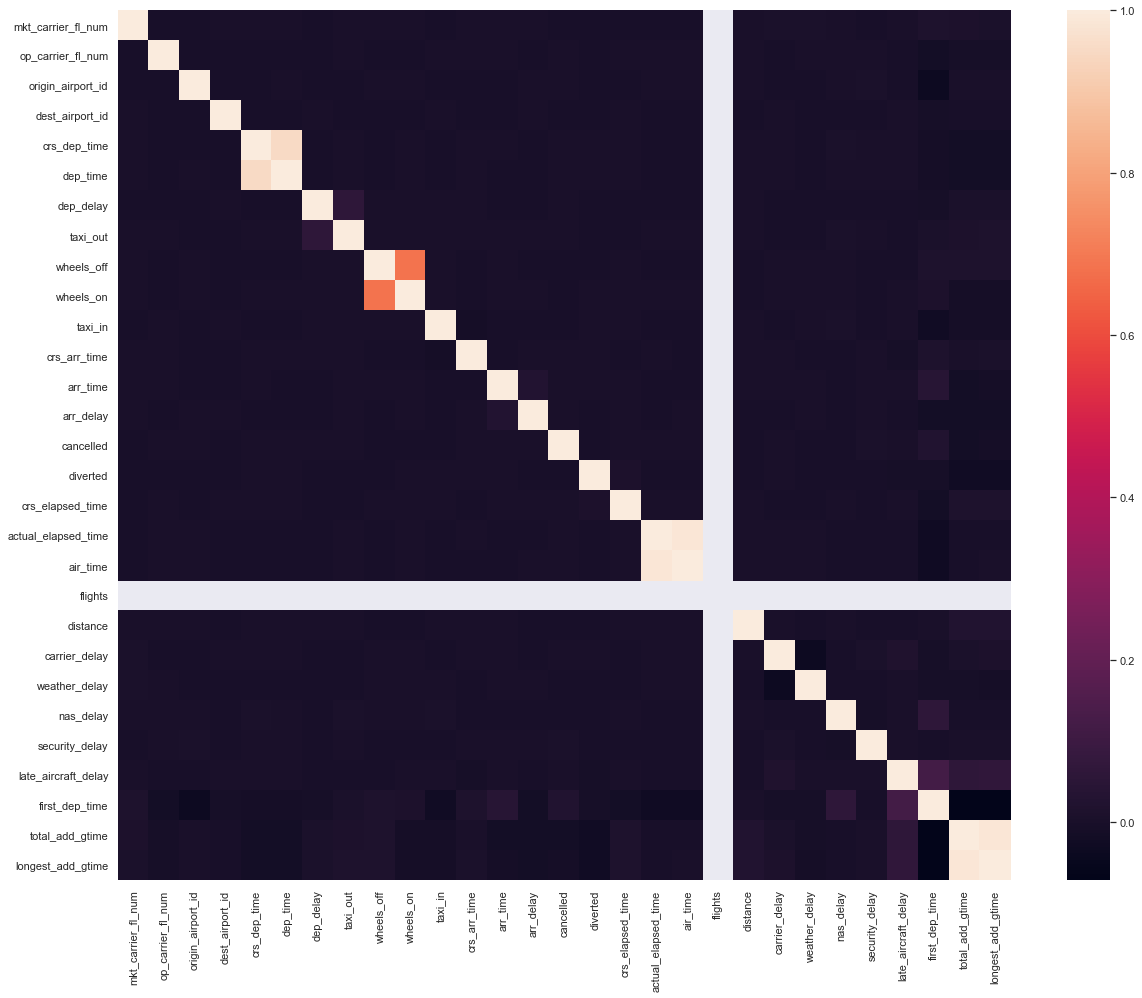

In [14]:
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(flights_corr)

<AxesSubplot:>

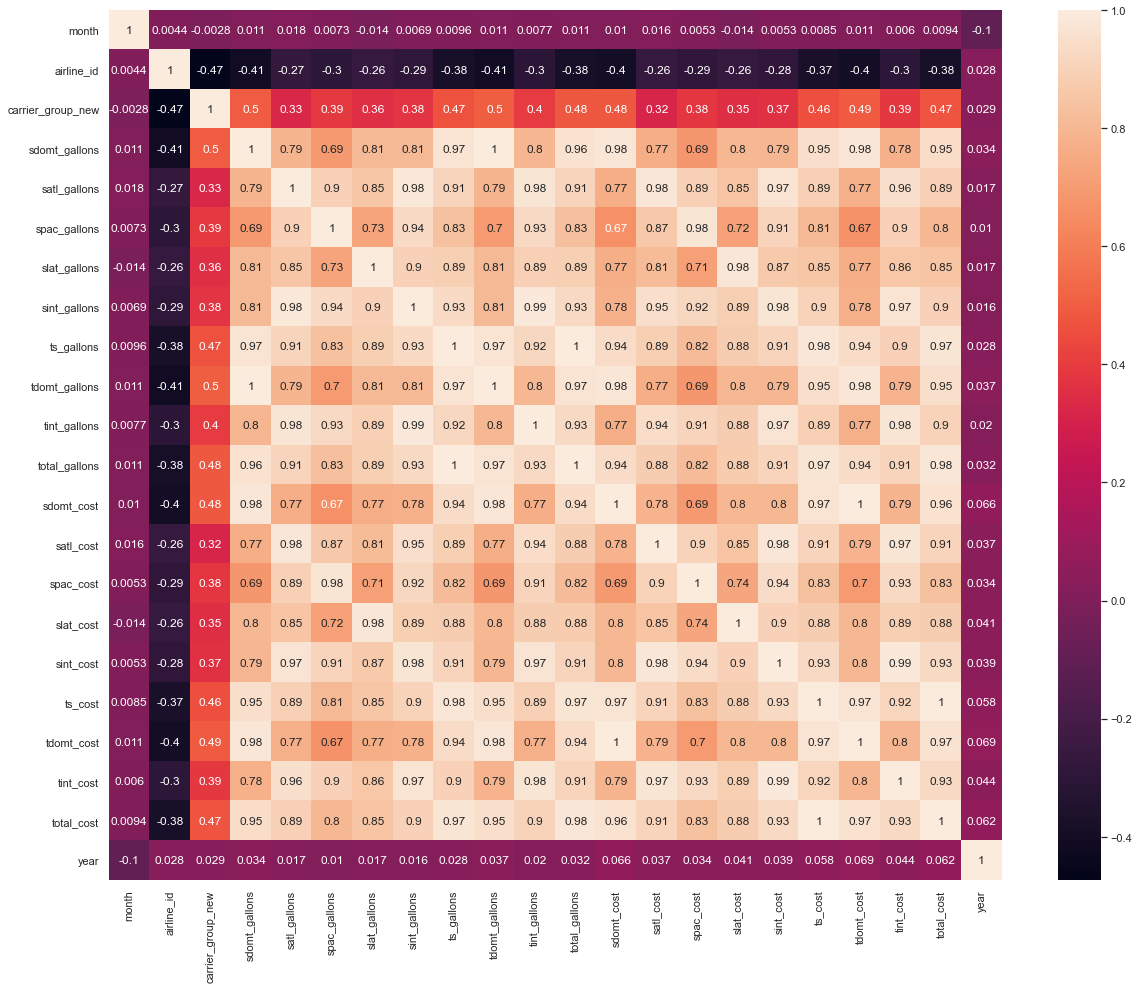

In [17]:
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(fuel_corr, annot=True)

<AxesSubplot:>

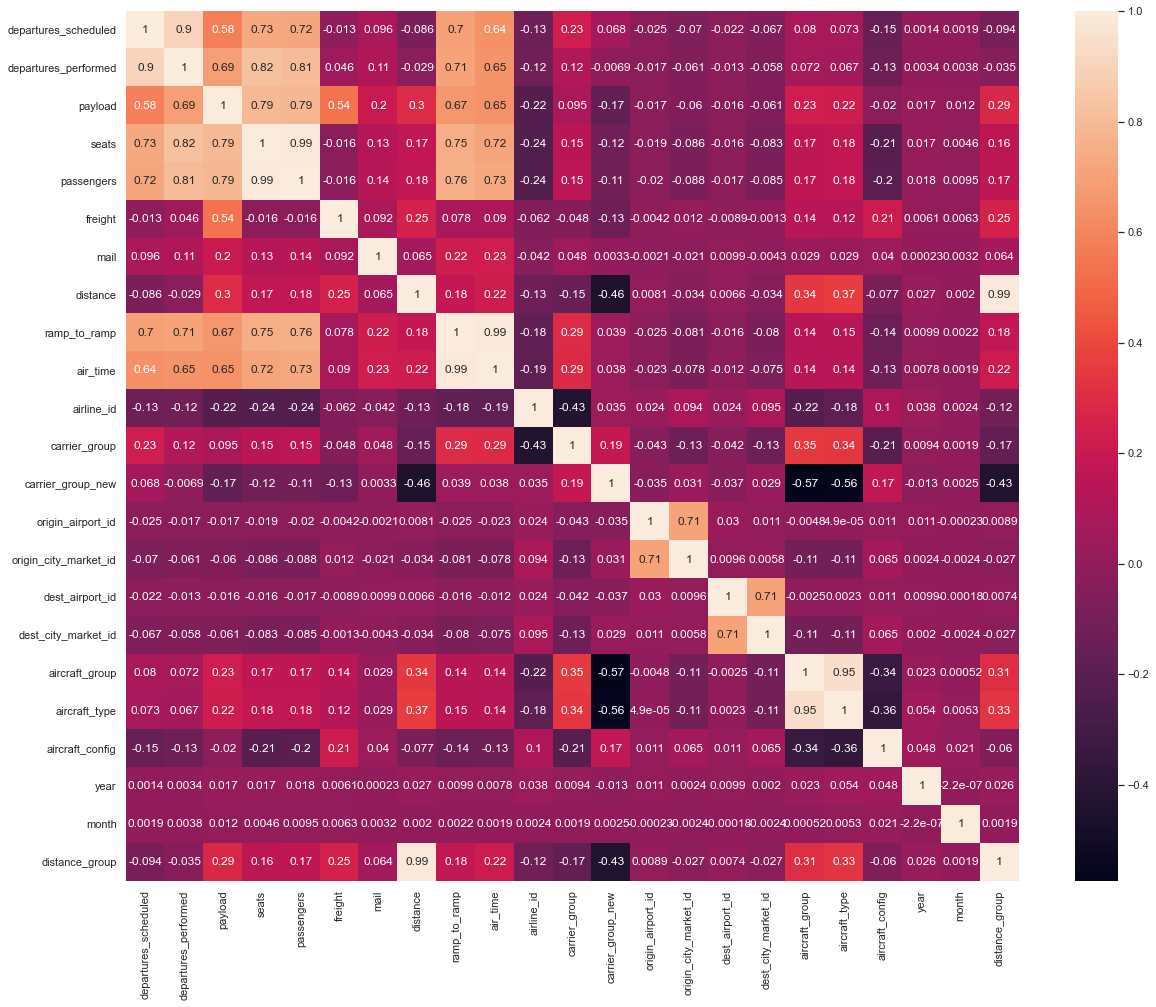

In [18]:
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(passengers_corr, annot=True)

<AxesSubplot:>

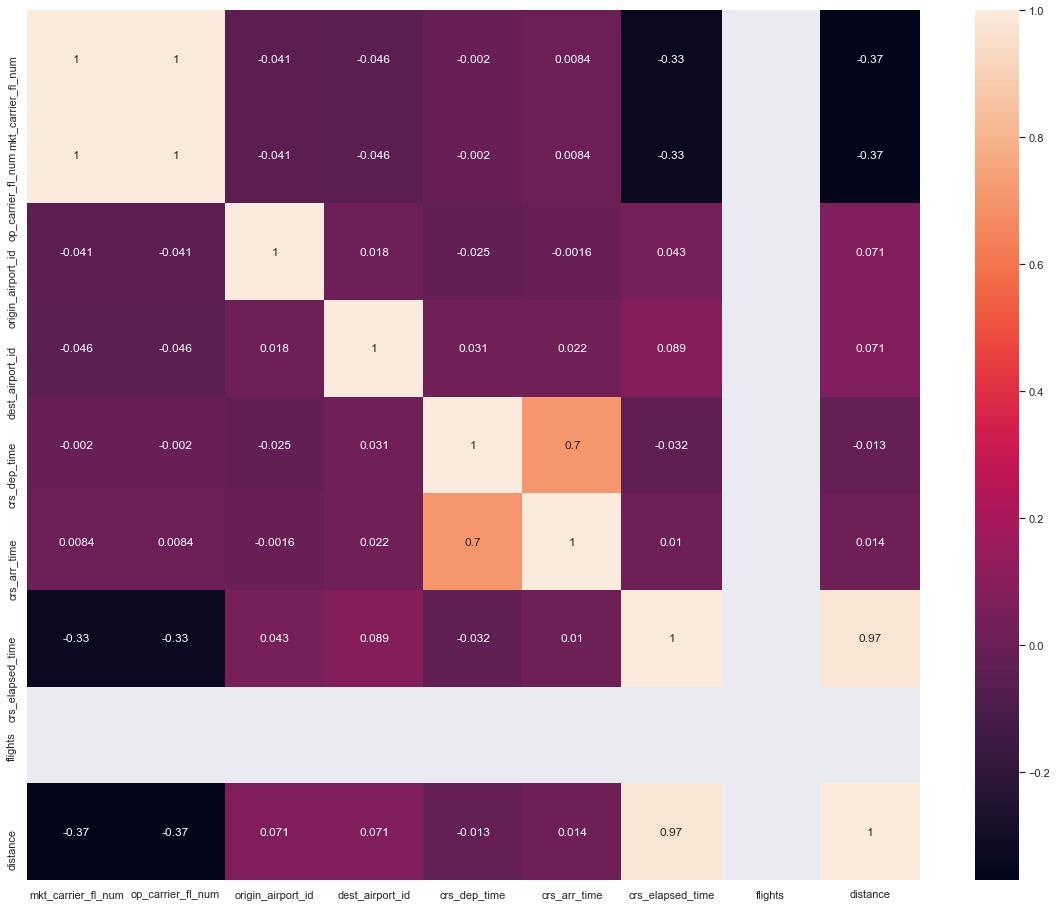

In [19]:
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(test_corr, annot=True)

### Feature Engineering - Passengers Table - Summary Tables of Features that may be useful
- Need to think about merging based on unique_carrier, year and month
- Data is less grandular being by month

In [62]:
passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,6.0,6.0,223200.0,1116.0,906.0,0.0,0.0,1259.0,1044.0,918.0,...,US,United States,6,694,1,2019,12,3,F,DU
1,6.0,6.0,187200.0,936.0,861.0,0.0,0.0,1208.0,1062.0,960.0,...,US,United States,6,698,1,2019,12,3,F,DU
2,6.0,6.0,214200.0,1071.0,982.0,0.0,0.0,917.0,768.0,690.0,...,US,United States,6,694,1,2019,12,2,F,DU
3,6.0,6.0,216000.0,1080.0,775.0,0.0,0.0,598.0,582.0,492.0,...,US,United States,6,694,1,2019,12,2,F,DU
4,6.0,6.0,173222.0,0.0,0.0,173220.0,0.0,620.0,542.0,476.0,...,US,United States,6,691,2,2019,2,2,G,DU


In [35]:
#Filter passengers down to features that may help
passengers[['unique_carrier','airline_id','origin_airport_id', 'dest_airport_id', 'year', 'month', 'passengers', 'seats', 'region', 'aircraft_group', 'aircraft_type', 'distance_group', 'class']]

,unique_carrier,airline_id,origin_airport_id,dest_airport_id,year,month,passengers,seats,region,aircraft_group,aircraft_type,distance_group,class
0,G4,20368,10466,15008,2019,12,906.0,1116.0,D,6,694,3,F
1,G4,20368,10666,10466,2019,12,861.0,936.0,D,6,698,3,F
2,G4,20368,10685,14761,2019,12,982.0,1071.0,D,6,694,2,F
3,G4,20368,10693,14761,2019,12,775.0,1080.0,D,6,694,2,F
4,5X,19917,13495,14730,2019,2,0.0,0.0,D,6,691,2,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350492,EV,20366,16271,13930,2019,12,387.0,420.0,D,6,673,1,F
2350493,G4,20368,10135,11697,2019,12,939.0,1062.0,D,6,694,3,F
2350494,G4,20368,10257,14761,2019,12,765.0,936.0,D,6,698,3,F
2350495,G4,20368,10466,10666,2019,12,806.0,936.0,D,6,698,3,F


In [48]:
# Airport, year, month --> Sum passengers, seats, freight, mail
passengers.groupby(['dest_airport_id', 'year', 'month']).sum()[['passengers', 'seats', 'freight', 'mail']].reset_index()

,dest_airport_id,year,month,passengers,seats,freight,mail
0,10005,2015,2,7.0,12.0,1585.0,0.0
1,10005,2015,3,47.0,159.0,19384.0,819.0
2,10005,2015,4,19.0,129.0,21634.0,170.0
3,10005,2015,5,19.0,114.0,21317.0,503.0
4,10005,2015,6,29.0,126.0,102198.0,1613.0
...,...,...,...,...,...,...,...
72229,16869,2019,12,7314.0,8591.0,55361.0,0.0
72230,16871,2019,9,2.0,8.0,0.0,0.0
72231,16872,2019,9,3.0,8.0,0.0,0.0
72232,16875,2019,12,9.0,9.0,0.0,0.0


In [50]:
# Year, month --> Sum passengers, seats, freight, mail
passengers.groupby(['year', 'month']).sum()[['passengers', 'seats', 'freight', 'mail']].reset_index().head()

,year,month,passengers,seats,freight,mail
0,2015,1,66352146.0,87245612.0,3.515474e+09,107617622.0
1,2015,2,61509629.0,78181748.0,3.456392e+09,97313885.0
2,2015,3,77125033.0,93862487.0,3.902887e+09,112383673.0
3,2015,4,74935523.0,92225139.0,3.721526e+09,113508676.0
4,2015,5,78671470.0,95160137.0,3.674822e+09,110614827.0


In [51]:
# Carrier, year, month --> Sum passengers, seats, freight, mail
passengers.groupby(['airline_id', 'year', 'month']).sum()[['passengers', 'seats', 'freight', 'mail']].reset_index()

,airline_id,year,month,passengers,seats,freight,mail
0,19393,2015,1,10486188.0,14540965.0,26728795.0,0.0
1,19393,2015,2,9939175.0,12848743.0,25478632.0,0.0
2,19393,2015,3,13009820.0,15877704.0,28963525.0,0.0
3,19393,2015,4,12678611.0,15700036.0,28026523.0,0.0
4,19393,2015,5,13043804.0,15869962.0,28008977.0,0.0
...,...,...,...,...,...,...,...
17206,22057,2019,10,1.0,14.0,0.0,0.0
17207,22057,2019,12,6.0,28.0,0.0,0.0
17208,22061,2019,11,4.0,24.0,0.0,0.0
17209,22061,2019,12,7.0,22.0,0.0,0.0


In [57]:
# Airline_id, year, month --> Most common region, aircraft_group, aircraft_type, distance_group, class,b
passengers.groupby(['airline_id', 'year', 'month'])[['region', 'aircraft_group', 'aircraft_type', 'distance_group', 'class']].agg(lambda x:x.value_counts().index[0]).reset_index()

,airline_id,year,month,region,aircraft_group,aircraft_type,distance_group,class
0,19393,2015,1,D,6,612,2,F
1,19393,2015,2,D,6,612,2,F
2,19393,2015,3,D,6,612,2,F
3,19393,2015,4,D,6,612,2,F
4,19393,2015,5,D,6,612,2,F
...,...,...,...,...,...,...,...,...
17206,22057,2019,10,I,7,770,9,L
17207,22057,2019,12,I,7,770,7,L
17208,22061,2019,11,I,7,775,7,L
17209,22061,2019,12,I,7,725,10,L


In [60]:
# Airline_id --> Most common region, aircraft_group, aircraft_type, distance_group, class,
passengers.groupby(['airline_id'])[['region', 'aircraft_group', 'aircraft_type', 'distance_group', 'class']].agg(lambda x:x.value_counts().index[0]).reset_index()

,airline_id,region,aircraft_group,aircraft_type,distance_group,class
0,19393,D,6,612,2,F
1,19531,I,6,698,3,F
2,19532,I,6,627,8,F
3,19533,I,6,637,16,F
4,19534,I,6,614,4,F
...,...,...,...,...,...,...
372,22036,I,8,818,8,G
373,22052,I,6,788,8,L
374,22057,I,7,770,7,L
375,22061,I,7,775,10,L


In [61]:
# Unique Carrier --> Most common region, aircraft_group, aircraft_type, distance_group, class,
passengers.groupby(['unique_carrier'])[['region', 'aircraft_group', 'aircraft_type', 'distance_group', 'class']].agg(lambda x:x.value_counts().index[0]).reset_index()

,unique_carrier,region,aircraft_group,aircraft_type,distance_group,class
0,02Q,I,6,622,11,L
1,04Q,D,4,479,1,L
2,07Q,I,6,614,3,F
3,09Q,D,6,617,1,L
4,0BQ,I,6,667,8,L
...,...,...,...,...,...,...
372,Z3Q,D,0,42,1,L
373,ZE,I,6,614,4,F
374,ZK,D,4,405,1,F
375,ZW,D,6,629,1,F


In [ ]:
# Airport_id, year, month --> Most common region, aircraft_group, aircraft_type, distance_group, class,
passengers.groupby(['dest_airport_id', 'year', 'month'])[['region', 'aircraft_group', 'aircraft_type', 'distance_group', 'class']].agg(lambda x:x.value_counts().index[0]).reset_index()

### Feature Engineering - Fuel Table - Summary Tables with Feature that may be useful

In [63]:
fuel.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,20408.932432,unique_carrier_unknown,0JQ,carrier_name_unknown,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.000000,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.000000,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.000000,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.000000,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016


In [64]:
#Filter fuel down to features that may help
fuel[['airline_id','unique_carrier', 'year', 'month', 'total_gallons', 'total_cost']]

,airline_id,unique_carrier,year,month,total_gallons,total_cost
0,20408.932432,unique_carrier_unknown,2016,1,3000.0,5100.0
1,21352.000000,0WQ,2016,1,210112.0,536455.0
2,21645.000000,23Q,2016,1,0.0,0.0
3,21652.000000,27Q,2016,1,0.0,0.0
4,20408.000000,5V,2016,1,284362.0,569497.0
...,...,...,...,...,...,...
3030,20377.000000,X9,2018,12,2531738.0,6172701.0
3031,20207.000000,XP,2018,12,0.0,0.0
3032,20378.000000,YV,2018,12,0.0,0.0
3033,20452.000000,YX,2018,12,21048.0,50043.0


In [66]:
fuel.groupby(['airline_id']).sum()[['total_gallons', 'total_cost']].reset_index()

,airline_id,total_gallons,total_cost
0,19393.0,9.599040e+09,1.816020e+10
1,19687.0,0.000000e+00,0.000000e+00
2,19690.0,1.213558e+09,2.119514e+09
3,19790.0,1.655025e+10,3.286616e+10
4,19805.0,1.663489e+10,2.853022e+10
...,...,...,...
58,21645.0,8.562840e+05,1.828776e+06
59,21650.0,9.019760e+06,1.562505e+07
60,21652.0,0.000000e+00,0.000000e+00
61,21712.0,6.080250e+06,2.375437e+07


In [67]:
fuel.groupby(['year']).sum()[['total_gallons', 'total_cost']].reset_index()

,year,total_gallons,total_cost
0,2015,1.734927e+10,3.219570e+10
1,2016,1.766837e+10,2.574208e+10
2,2017,1.802888e+10,3.063017e+10
3,2018,1.887300e+10,4.050386e+10
4,2019,1.443517e+10,2.897015e+10


In [69]:
fuel.groupby(['year', 'month']).sum()[['total_gallons', 'total_cost']].reset_index().tail(21)

,year,month,total_gallons,total_cost
36,2018,1,1.447079e+09,2.926900e+09
37,2018,2,1.328902e+09,2.703829e+09
38,2018,3,1.553633e+09,3.065376e+09
39,2018,4,1.552851e+09,3.184997e+09
40,2018,5,1.617006e+09,3.550766e+09
41,2018,6,1.660384e+09,3.685838e+09
42,2018,7,1.726278e+09,3.813308e+09
43,2018,8,1.706025e+09,3.755935e+09
44,2018,9,1.552574e+09,3.424800e+09
45,2018,10,1.611459e+09,3.736134e+09


In [70]:
fuel.groupby(['unique_carrier']).sum()[['total_gallons', 'total_cost']].reset_index()

,unique_carrier,total_gallons,total_cost
0,09Q,41034111.0,101331829.0
1,0JQ,838615.0,2295937.0
2,0WQ,3253401.0,9842749.0
3,1BQ,6672792.0,17888506.0
4,23Q,856284.0,1828776.0
...,...,...,...
58,XP,19013295.0,41063468.0
59,YV,0.0,0.0
60,YX,287098389.0,429417140.0
61,ZW,130683426.0,213645171.0


### Import Average arr_delay by unique_carrier into Passengers and Fuel Tables and see if there are any correlations

In [74]:
# Average delay by unique_carrer
avg_delay_per_carrier = flights[['op_unique_carrier', 'arr_delay']].groupby(['op_unique_carrier']).mean().reset_index()
avg_delay_per_carrier.head()

,op_unique_carrier,arr_delay
0,9E,5.079317
1,9K,7.160389
2,AA,5.426766
3,AS,5.894499
4,AX,4.998606


In [81]:
# Merge with fuel table and drop nas
fuel_delay = pd.merge(fuel, avg_delay_per_carrier, how='left', left_on='unique_carrier', right_on='op_unique_carrier')
fuel_delay = fuel_delay.dropna().reset_index()
fuel_delay.head()

,index,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,...,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year,op_unique_carrier,arr_delay
0,8,1,20363.0,9E,9E,Endeavor Air Inc.,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,9E,5.079317
1,10,1,19805.0,AA,AA,American Airlines Inc.,3,174110023.0,34804210.0,18848029.0,...,18632951.0,68174028.0,121343530.0,316442074.0,195806362.0,121537723.0,317344085.0,2016,AA,5.426766
2,12,1,19930.0,AS,AS,Alaska Airlines Inc.,3,36507433.0,0.0,0.0,...,0.0,1324811.0,1324811.0,47052077.0,45827760.0,1324811.0,47152571.0,2016,AS,5.894499
3,13,1,20409.0,B6,B6,JetBlue Airways,3,48414077.0,0.0,0.0,...,0.0,14109959.0,14109959.0,70372096.0,56262137.0,14275362.0,70537499.0,2016,B6,5.262804
4,14,1,21167.0,CP,CP,Compass Airlines,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,CP,5.402983


<AxesSubplot:>

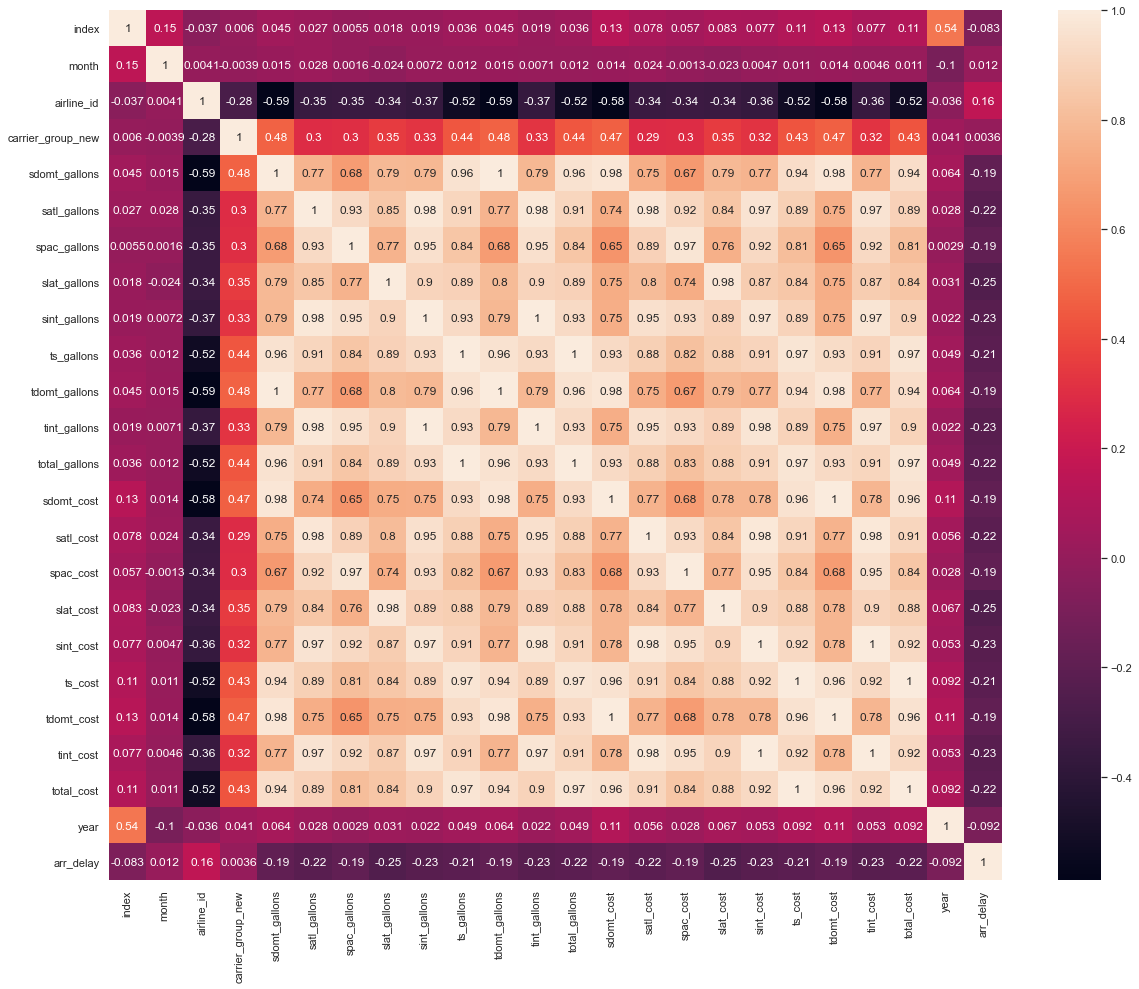

In [82]:
#Correlation matrix for fuel with arr_delay added
fuel_delay_corr = fuel_delay.corr()
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(fuel_delay_corr, annot=True)

In [87]:
# Merge passenger table with arr_delay
passengers_delay = pd.merge(passengers, avg_delay_per_carrier, how='left', left_on='unique_carrier', right_on='op_unique_carrier')
passengers_delay = passengers_delay.dropna().reset_index()
passengers_delay.head()

,index,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,...,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source,op_unique_carrier,arr_delay
0,0,6.0,6.0,223200.0,1116.0,906.0,0.0,0.0,1259.0,1044.0,...,6,694,1,2019,12,3,F,DU,G4,5.253797
1,1,6.0,6.0,187200.0,936.0,861.0,0.0,0.0,1208.0,1062.0,...,6,698,1,2019,12,3,F,DU,G4,5.253797
2,2,6.0,6.0,214200.0,1071.0,982.0,0.0,0.0,917.0,768.0,...,6,694,1,2019,12,2,F,DU,G4,5.253797
3,3,6.0,6.0,216000.0,1080.0,775.0,0.0,0.0,598.0,582.0,...,6,694,1,2019,12,2,F,DU,G4,5.253797
4,41,6.0,6.0,130818.0,456.0,399.0,0.0,0.0,403.0,579.0,...,6,673,1,2019,4,1,F,DU,YX,5.454726


<AxesSubplot:>

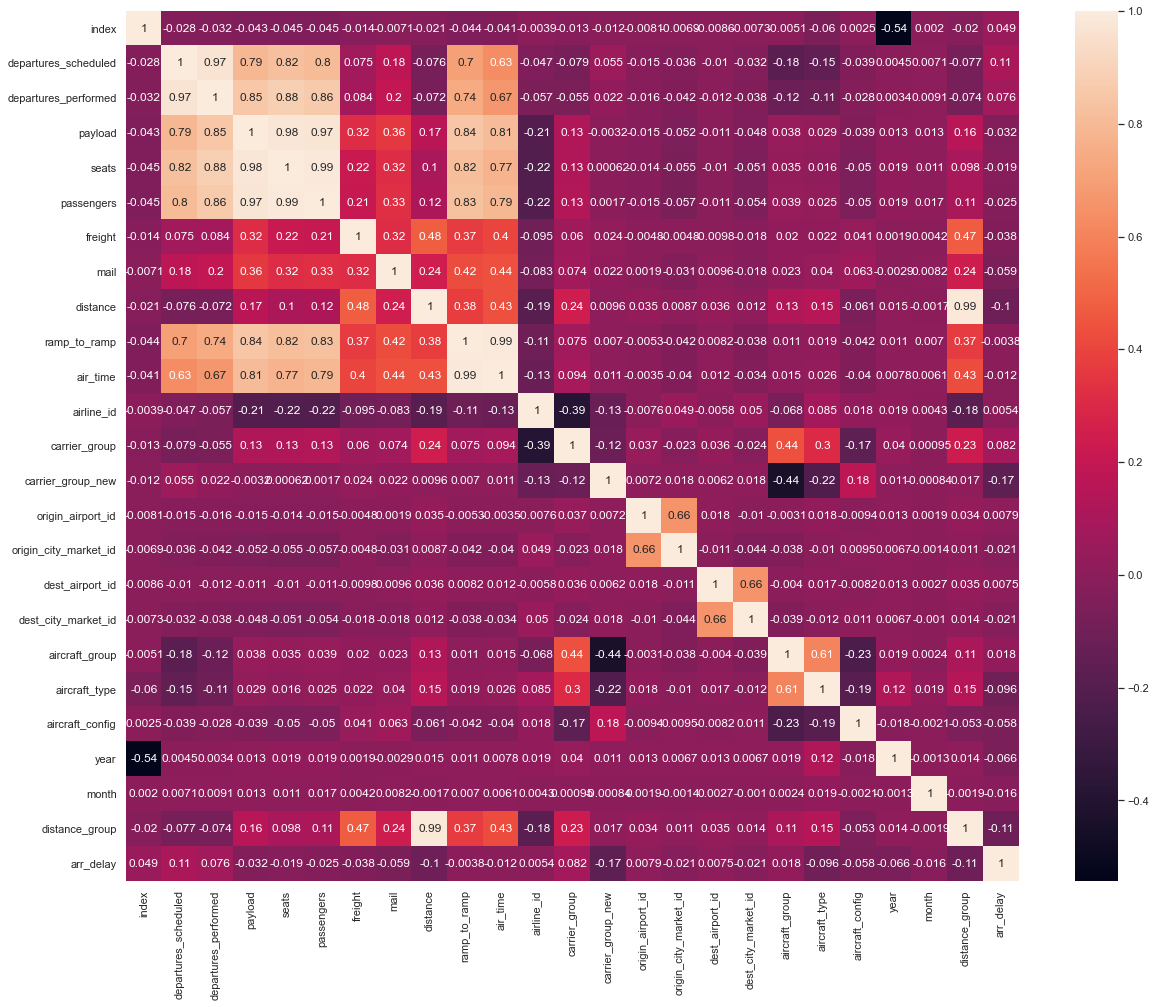

In [88]:
#Correlation matrix for passengers with arr_delay added
passengers_delay_corr = passengers_delay.corr()
sns.set(rc={'figure.figsize':(20,16)})
sns.heatmap(passengers_delay_corr, annot=True)